# Reading dataset

In [96]:
# import library and read dataset
import pandas as pd

df_reviews = pd.read_csv('IMDB Dataset.csv')

In [97]:
df_reviews

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [98]:
# take a sample of 10000 rows to make processing faster and get imbalance data
# 9000 positives
df_positive = df_reviews[df_reviews['sentiment']=='positive'][:9000]
# 1000 negative
df_negative = df_reviews[df_reviews['sentiment']=='negative'][:1000]

In [99]:
df_reviews_imb = pd.concat([df_positive, df_negative])

In [100]:
df_reviews_imb.value_counts('sentiment')

sentiment
positive    9000
negative    1000
Name: count, dtype: int64

# Dealing with Imbalanced Classes

<Axes: xlabel='sentiment'>

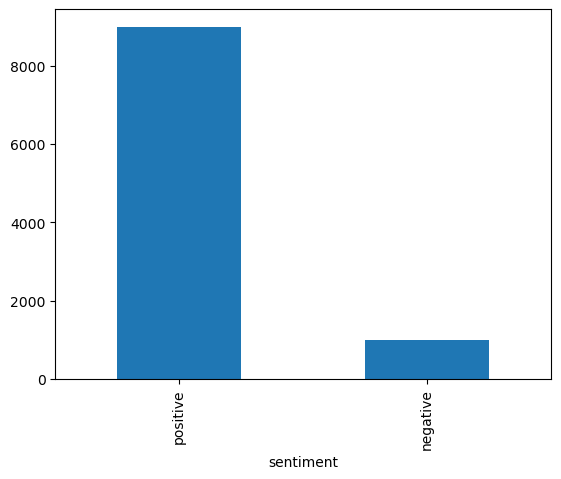

In [101]:
# make a barplot to show how data is distributed
df_reviews_imb.value_counts('sentiment').plot(kind='bar')

## Balancing data with .sample()

In [102]:
length_negative = len(df_reviews_imb[df_reviews_imb['sentiment']=='negative'])

In [103]:
df_reviews_positive = df_reviews_imb[df_reviews_imb['sentiment']=='positive'].sample(n=length_negative)

In [104]:
df_reviews_negative = df_reviews_imb[df_reviews_imb['sentiment']=='negative']

In [105]:
df_reviews_bal = pd.concat([df_reviews_positive, df_reviews_negative])

In [106]:
df_reviews_bal.reset_index(drop=True, inplace=True)

In [107]:
df_reviews_bal.value_counts('sentiment')

sentiment
negative    1000
positive    1000
Name: count, dtype: int64

In [136]:
df_reviews_bal

,review,sentiment
3,Basically there's a family where a little boy ...,negative
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
10,Phil the Alien is one of those quirky films wh...,negative
11,I saw this movie when I was about 12 when it c...,negative
...,...,...
10833,Knute Rockne led an extraordinary life and his...,positive
1039,At the height of the 'Celebrity Big Brother' r...,positive
5255,This is another of Robert Altman's underrated ...,positive
12237,This movie won a special award at Cannes for i...,positive


## Balancing data with RandomUnderSampler

In [108]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0)


df_reviews_bal, df_reviews_bal['sentiment'] = rus.fit_resample(df_reviews_imb[['review']],
                                                             df_reviews_imb['sentiment'])

In [109]:
df_reviews_imb.value_counts('sentiment')

sentiment
positive    9000
negative    1000
Name: count, dtype: int64

In [110]:
df_reviews_bal.value_counts('sentiment')

sentiment
negative    1000
positive    1000
Name: count, dtype: int64

# Splitting data into train and test

In [111]:
# import train_test_split
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_reviews_bal, test_size=0.33,
                               random_state=42)

In [112]:
train_x, train_y = train['review'], train['sentiment']
test_x, test_y = test['review'], test['sentiment']

In [113]:
train_x
train_y.value_counts()

sentiment
negative    675
positive    665
Name: count, dtype: int64

# Text Representation (Bag of Words) 

## Count Vectorizer

In [114]:
from sklearn.feature_extraction.text import CountVectorizer

text = ["I love writing code in Python. I love Python code",
        "I hate writing code in Java. I hate Java code"]

df = pd.DataFrame({'review':['review1', 'review2'], 'text':text})
cv = CountVectorizer(stop_words='english')
cv_matrix = cv.fit_transform(df['text'])

In [115]:
df_dtm = pd.DataFrame(cv_matrix.toarray(), index=df['review'].values,
                      columns=cv.get_feature_names_out())

In [116]:
df_dtm

,code,hate,java,love,python,writing
review1,2,0,0,2,2,1
review2,2,2,2,0,0,1


## Tfidf

In [117]:
from sklearn.feature_extraction.text import TfidfVectorizer

text = ["I love writing code in Python. I love Python code",
        "I hate writing code in Java. I hate Java code"]

df = pd.DataFrame({'review':['review1', 'review2'], 'text':text})
tfidf = TfidfVectorizer(stop_words='english', norm=None)
tfidf_matrix = tfidf.fit_transform(df['text'])

In [118]:
pd.DataFrame(tfidf_matrix.toarray(), index=df['review'].values,
                      columns=tfidf.get_feature_names_out())

,code,hate,java,love,python,writing
review1,2.0,0.00000,0.00000,2.81093,2.81093,1.0
review2,2.0,2.81093,2.81093,0.00000,0.00000,1.0


# Turning our text data into numerical vectors

In [119]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')
train_x_vector = tfidf.fit_transform(train_x)

In [120]:
test_x_vector = tfidf.transform(test_x)

In [121]:
train_x_vector

<1340x20625 sparse matrix of type '<class 'numpy.float64'>'
	with 118834 stored elements in Compressed Sparse Row format>

In [122]:
test_x_vector

<660x20625 sparse matrix of type '<class 'numpy.float64'>'
	with 53486 stored elements in Compressed Sparse Row format>

In [123]:
pd.DataFrame.sparse.from_spmatrix(train_x_vector,
                                  index=train_x.index,
                                  columns=tfidf.get_feature_names_out())

,00,000,007,01pm,02,04,08,10,100,1000,...,zooming,zooms,zues,zzzzzzzzzzzzzzzzzz,æon,élan,émigré,ísnt,ïn,ünfaithful
144,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1839,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16588,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
742,0,0,0,0,0,0,0,0.042791,0,0,...,0,0,0,0,0,0,0,0,0,0
9464,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10644,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16133,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1739,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2443,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Model Selection

## Support Vector Machines (SVM)

In [124]:
from sklearn.svm import SVC

svc = SVC(kernel='linear')
svc.fit(train_x_vector, train_y)

SVC(kernel='linear')

In [125]:
print(svc.predict(tfidf.transform(['A good movie'])))
print(svc.predict(tfidf.transform(['An excellent movie'])))
print(svc.predict(tfidf.transform(['I did not like this movie at all I gave this movie away'])))

['positive']
['positive']
['negative']


## Decision Tree

In [126]:
from sklearn.tree import DecisionTreeClassifier

dec_tree = DecisionTreeClassifier()
dec_tree.fit(train_x_vector, train_y)

DecisionTreeClassifier()

## Naive Bayes

In [127]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(train_x_vector.toarray(), train_y)

GaussianNB()

## Logistic Regression

In [128]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(train_x_vector, train_y)

LogisticRegression()

# Model Evaluation

## Confusion Matrix

In [129]:
# calculate confusion matrix of svc
from sklearn.metrics import confusion_matrix

confusion_matrix(test_y,
                 svc.predict(test_x_vector),
                 labels=['positive', 'negative'])

array([[290,  45],
       [ 60, 265]], dtype=int64)

## Mean Accuracy

In [130]:
# calculate accuracy of all models

print(svc.score(test_x_vector, test_y))
print(dec_tree.score(test_x_vector, test_y))
print(gnb.score(test_x_vector.toarray(), test_y))
print(log_reg.score(test_x_vector, test_y))


# model.score(test_x_vector, test_y)




0.8409090909090909
0.6590909090909091
0.6348484848484849
0.8303030303030303


## F1 Score

In [131]:
from sklearn.metrics import f1_score

f1_score(test_y, svc.predict(test_x_vector),
         labels=['positive', 'negative'],
         average=None)

array([0.84671533, 0.83464567])

## Classification report

In [132]:
from sklearn.metrics import classification_report

print(classification_report(test_y,
                      svc.predict(test_x_vector),
                      labels=['positive', 'negative'])
)

              precision    recall  f1-score   support

    positive       0.83      0.87      0.85       335
    negative       0.85      0.82      0.83       325

    accuracy                           0.84       660
   macro avg       0.84      0.84      0.84       660
weighted avg       0.84      0.84      0.84       660



# Tuning the Model

## GridSearchCV

In [133]:
from sklearn.model_selection import GridSearchCV

parameters = {'C': [1,4,8,16,32], 'kernel':['linear', 'rbf']}
svc = SVC()
svc_grid = GridSearchCV(svc, parameters, cv=5)
svc_grid.fit(train_x_vector, train_y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 4, 8, 16, 32], 'kernel': ['linear', 'rbf']})

In [134]:
svc_grid.best_params_

{'C': 1, 'kernel': 'linear'}

In [135]:
svc_grid.best_estimator_

SVC(C=1, kernel='linear')